In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [2]:
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop(['Cabin'],axis = 1, inplace = True)

In [7]:
df.dropna(inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
survived_counts = df['Survived'].value_counts()

In [11]:
survived_counts

Survived
0    424
1    288
Name: count, dtype: int64

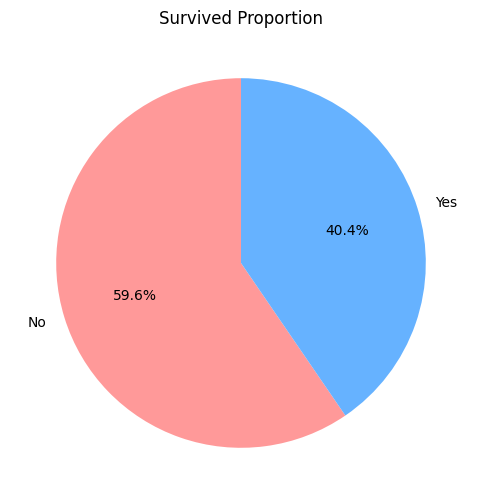

In [12]:
plt.figure(figsize=(8,6))
plt.pie(survived_counts,labels=['No','Yes'],autopct='%1.1f%%',colors = ['#FF9999','#66B2FF'],startangle = 90)
plt.title('Survived Proportion')
plt.show()

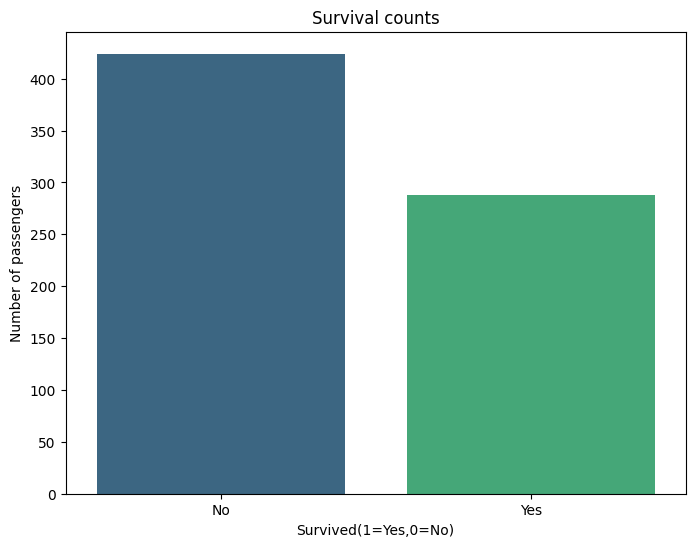

In [13]:
plt.figure(figsize =(8,6))
sns.barplot(x=survived_counts.index,y=survived_counts.values,palette = 'viridis')
plt.title('Survival counts')
plt.xlabel('Survived(1=Yes,0=No)')
plt.ylabel('Number of passengers')
plt.xticks([0,1],['No','Yes'])
plt.show()

In [14]:
#Pclass column
df['Pclass'].value_counts()

Pclass
3    355
1    184
2    173
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


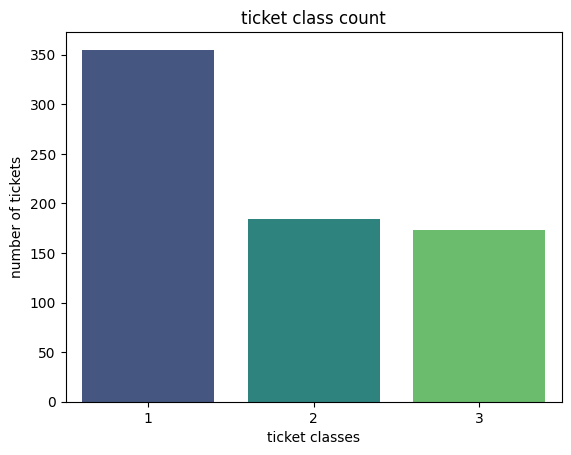

In [15]:
sns.barplot(x=[1,2,3],y=df['Pclass'].value_counts(),palette='viridis')
plt.title("ticket class count")
plt.ylabel('number of tickets')
plt.xlabel('ticket classes')
plt.show()

In [16]:
#Gender column
df.Sex.value_counts()

Sex
male      453
female    259
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


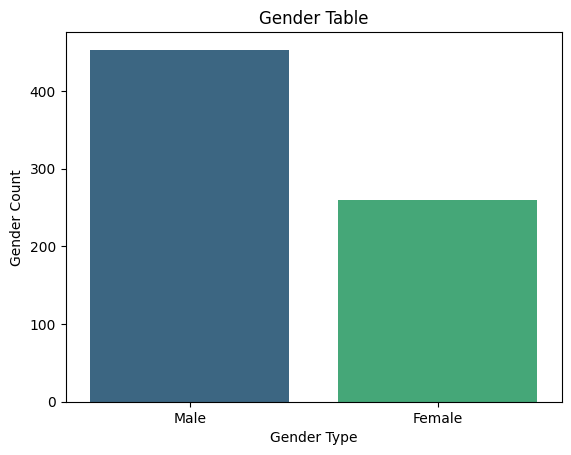

In [17]:
sns.barplot(x=['Male','Female'],y=df.Sex.value_counts(),palette='viridis')
plt.title("Gender Table")
plt.xlabel('Gender Type')
plt.ylabel('Gender Count')
plt.show()


In [18]:
df.Age.describe()


count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


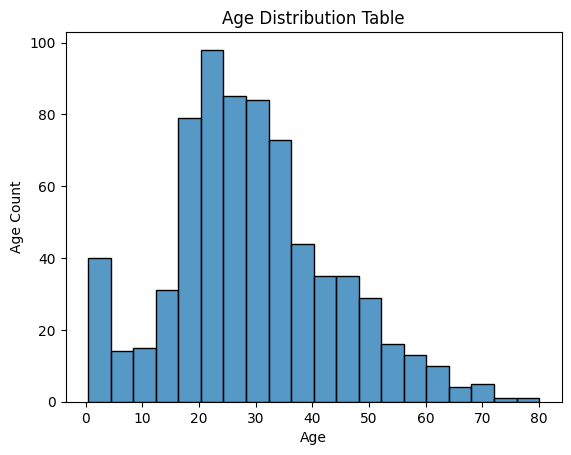

In [19]:
sns.histplot(x=df['Age'],bins=20)
plt.title("Age Distribution Table")
plt.xlabel("Age")
plt.ylabel('Age Count')
plt.show()


In [20]:
df.SibSp.value_counts()


SibSp
0    469
1    183
2     25
4     18
3     12
5      5
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

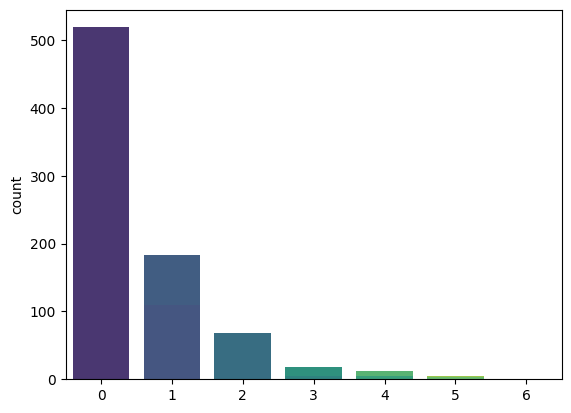

In [21]:
sns.barplot(x=['0','1','2','3','4','5'],y=df.SibSp.value_counts(),palette='viridis')
df.Parch.value_counts()

sns.barplot(x=['0','1','2','3','4','5','6'],y=df.Parch.value_counts(),palette='viridis')
df.Fare.describe()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Fair Price')

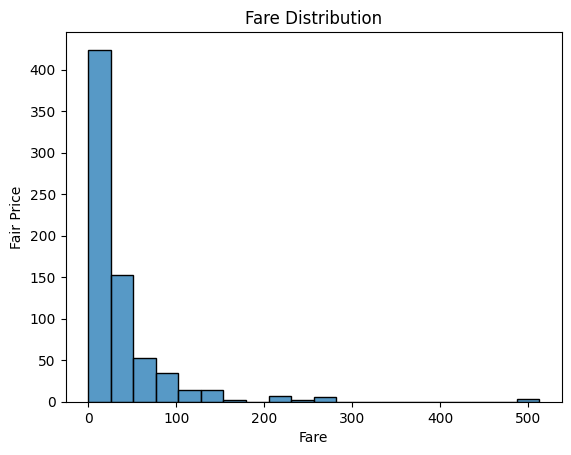

In [22]:
sns.histplot(df['Fare'], bins=20)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Fair Price")


In [23]:
Q1= df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)

IQR=Q3-Q1

upper=Q3 + 1.5*IQR
Lower=Q1 - 1.5*IQR

print(upper)
print(Lower)



70.425
-29.374999999999996


In [24]:
df[df["Fare"]>70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,S
...,...,...,...,...,...,...,...,...,...,...,...
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,S
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,S
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S


In [25]:
Embarked_counts=df['Embarked'].value_counts()
Embarked_counts



Embarked
S    554
C    130
Q     28
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: ylabel='count'>

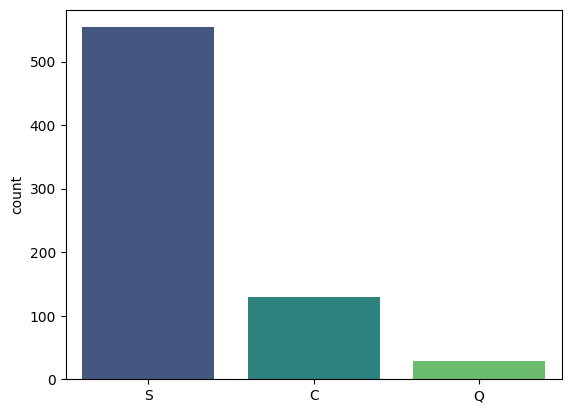

In [26]:
sns.barplot(x=['S','C','Q'],y=Embarked_counts,palette='viridis')



In [27]:
df.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           195
        0            64
male    0           360
        1            93
Name: count, dtype: int64

In [28]:
df.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           120
        0            64
2       0            90
        1            83
3       0           270
        1            85
Name: count, dtype: int64

In [29]:
df.groupby(['Pclass','Sex'])['Survived'].value_counts()


Pclass  Sex     Survived
1       female  1            80
                0             3
        male    0            61
                1            40
2       female  1            68
                0             6
        male    0            84
                1            15
3       female  0            55
                1            47
        male    0           215
                1            38
Name: count, dtype: int64

In [30]:
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [31]:
df[df['Survived']==0].groupby(['AgeGroup'])['Survived'].value_counts()

/tmp/ipykernel_17/2852615816.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['Survived']==0].groupby(['AgeGroup'])['Survived'].value_counts()


AgeGroup  Survived
0-18      0            52
19-35     0           231
36-50     0            94
51-65     0            37
66+       0            10
Name: count, dtype: int64

In [32]:
df.groupby(['AgeGroup','Sex'])['Survived'].value_counts()

/tmp/ipykernel_17/4238015194.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AgeGroup','Sex'])['Survived'].value_counts()


AgeGroup  Sex     Survived
0-18      female  1            38
                  0            17
          male    0            35
                  1            23
19-35     female  1            94
                  0            31
          male    0           200
                  1            41
36-50     female  1            44
                  0            14
          male    0            80
                  1            22
51-65     female  1            19
                  0             2
          male    0            35
                  1             6
66+       female  0             0
                  1             0
          male    0            10
                  1             1
Name: count, dtype: int64

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  712 non-null    int64   
 1   Survived     712 non-null    int64   
 2   Pclass       712 non-null    int64   
 3   Name         712 non-null    object  
 4   Sex          712 non-null    object  
 5   Age          712 non-null    float64 
 6   SibSp        712 non-null    int64   
 7   Parch        712 non-null    int64   
 8   Ticket       712 non-null    object  
 9   Fare         712 non-null    float64 
 10  Embarked     712 non-null    object  
 11  AgeGroup     712 non-null    category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 67.7+ KB


In [34]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


In [35]:
df.drop(['PassengerId','Ticket','Name','AgeGroup'],axis=1,inplace=True)

In [36]:
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [37]:
encoder= LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['Embarked']=encoder.fit_transform(df['Embarked'])
df['Survived']=encoder.fit_transform(df['Survived'])

In [38]:
X=df.drop(columns=["Survived"])
y=df.Survived

X
y


0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=7)

In [40]:
model=LogisticRegression(max_iter=12000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=12000)

In [41]:
y_pred=model.predict(X_test)

In [42]:
model.score(X_train,y_train)*100

81.01933216168717

In [43]:
model.score(X_test,y_test)*100

79.72027972027972

In [44]:
rate=accuracy_score(y_test,y_pred)*100
print(f'{int(rate)}%')

79%


In [45]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84        88
           1       0.80      0.64      0.71        55

    accuracy                           0.80       143
   macro avg       0.80      0.77      0.78       143
weighted avg       0.80      0.80      0.79       143

[[79  9]
 [20 35]]


In [46]:
modelsv=SVC()
modelsv.fit(X_train,y_train)
y_pred=modelsv.predict(X_test)

In [47]:
#decisiontreeclassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(classifier.score(X_train,y_train)*100)
print(classifier.score(X_test,y_test)*100)
print(accuracy_score(y_test,y_pred)*100)

98.76977152899823
75.52447552447552
75.52447552447552


In [48]:
#knn classifier
ModelK=KNeighborsClassifier(n_neighbors=12)
ModelK.fit(X_train,y_train)
ModelK.score(X_train,y_train)*100
y_pred=ModelK.predict(X_test)
ModelK.score(X_train,y_train)*100
ModelK.score(X_test,y_test)*100
rate=accuracy_score(y_test,y_pred)*100
print(f'{int(rate)}%')
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

71%
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        88
           1       0.65      0.55      0.59        55

    accuracy                           0.71       143
   macro avg       0.70      0.68      0.69       143
weighted avg       0.71      0.71      0.71       143

[[72 16]
 [25 30]]
